# Prediction using Decision Tree Algorithm


-  Create the Decision Tree classifier and visualize it graphically

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# remove errors
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
import os
os.listdir()

['.ipynb_checkpoints', 'Iris.csv', 'Untitled.ipynb']

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
### Shape of dataset

In [6]:
df.shape

(150, 6)

- Here total 150 samples and 6 feature

### Checking the missing values

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- Here in this dataset, there is no null values.

### Checking the datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Visualization

### Checking the dataset Balanced or Not

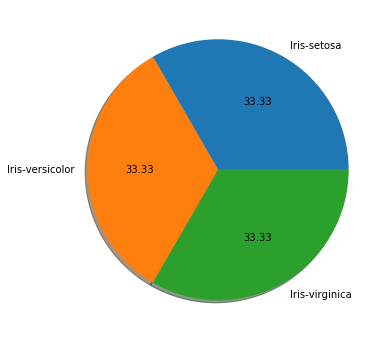

In [10]:
v = df['Species'].value_counts()
plt.figure(figsize= (6,6))
label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.pie(v, autopct = '%0.02f', labels= label, shadow = True)
plt.show()

- As we can see after execution of this __“iris[“species”].value_counts()”__ ,the data distribution among setosa, virginica, versicolor are equal so iris dataset is a Balanced dataset (as the number of data points for every class is 50)

### Independent and dependent variables

In [11]:
X = df.iloc[:,[1,2,3,4]]  ## dropping id column
y = df.iloc[:,5]

### Label encoding of dependent variable

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- here we sucessfully converted our categorical feature into numeric

### Splitting the dataset into train and test set

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=  0.20)


### Appling Decision Tree Algorithm

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt =  DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier()

### Predict the test set

In [16]:
y_pred = dt.predict(X_test)

In [17]:
y_pred

array([1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2,
       0, 2, 0, 1, 0, 0, 0, 0])

### Evaluate the performance of the model

In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]


In [19]:
print('Accuracy Score :',accuracy_score(y_test,y_pred))

Accuracy Score : 0.9666666666666667


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### Visualizing the decision tree

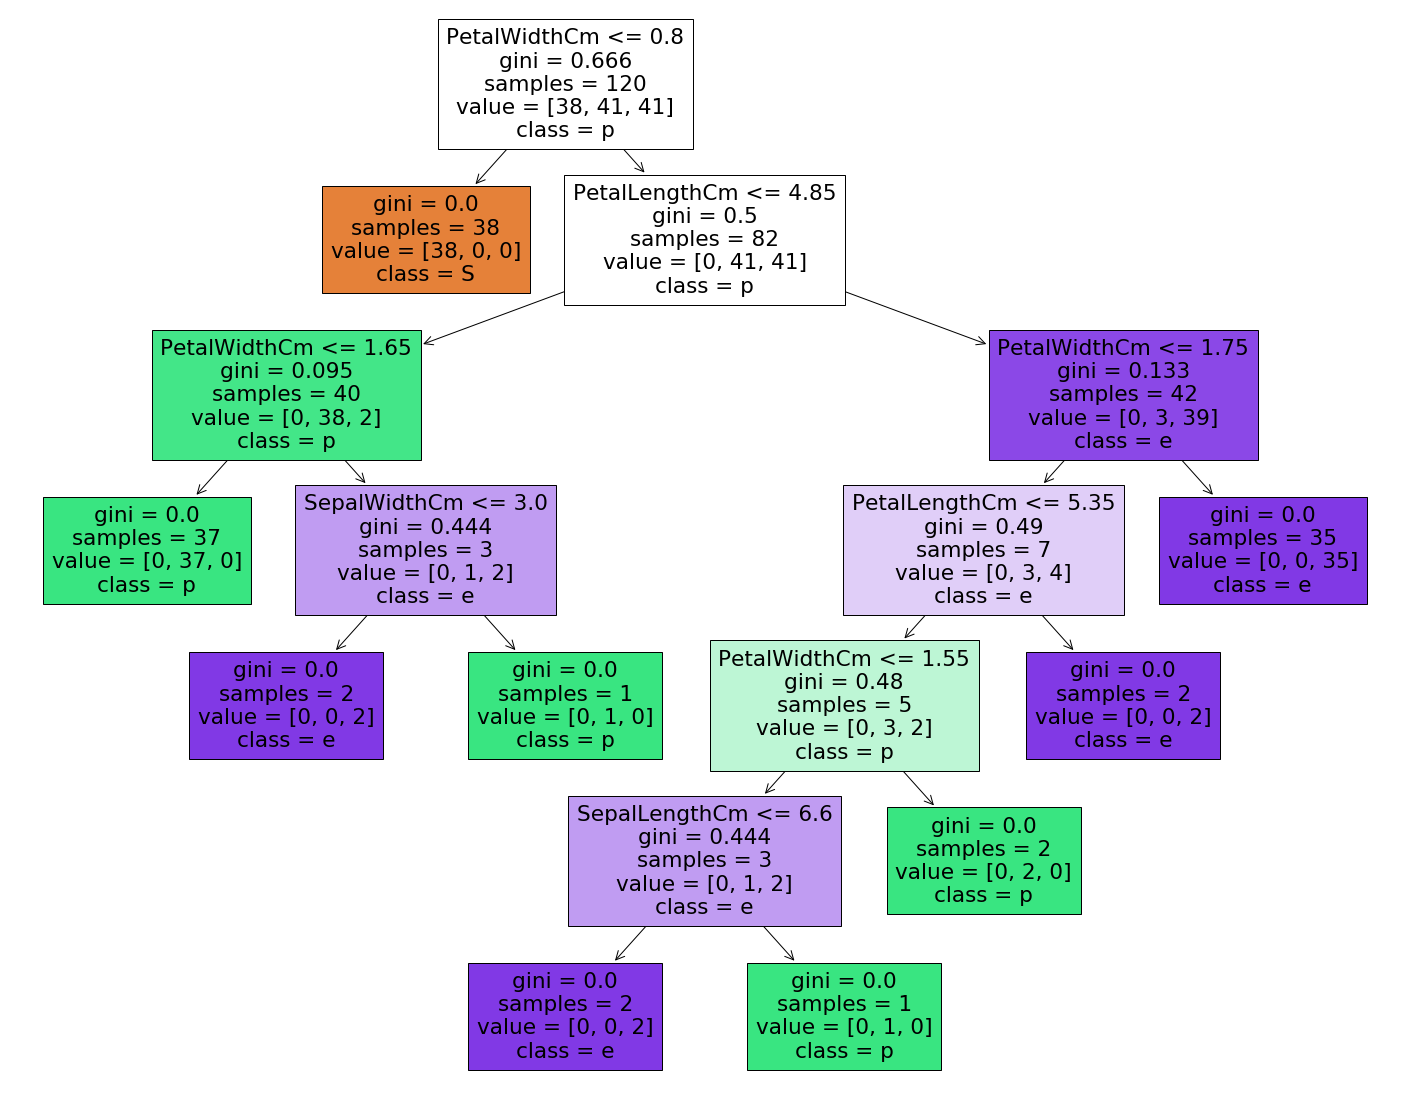

In [21]:
from sklearn.tree import plot_tree
feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target_names='Species'
plt.figure(figsize=(25,20))
plot_tree(dt, 
        feature_names=feature_names,  
        class_names=target_names,
        filled=True)
plt.show()